In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import system_utils as su

INFO - 2021-01-06 08:04:29,902 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-06 08:04:29,904 - settings - Setting database.user to celiib
INFO - 2021-01-06 08:04:29,904 - settings - Setting database.password to newceliipass
INFO - 2021-01-06 08:04:29,916 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-06 08:04:29,916 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-06 08:04:29,940 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-06 08:04:30,191 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-06 08:04:30,268 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-06 08:04:30,514 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [37]:
import datajoint as dj
dj.config["display.limit"] = 40

In [38]:
minnie.Decomposition() & "n_error_limbs>1"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134988472442,0,0.25,=BLOB=,760380,1540479,2,2,1,2,13,356,154,8946949.505293293,4539226.960667551,14612.677,83.572,83.572,460.773,357.467,2745,0.00030680848241917237,7.71067415730337,3989981.809,120,0.0006879730613829473,22.875,142610143158.787,29636743.193003334,15939.526994582277,35742.05346929365,1188417859.6565583,2946.8047
864691135081644023,0,0.25,=BLOB=,853714,1717788,3,2,2,2,12,274,133,9153647.235968873,3241695.1367920083,19845.782,148.853,147.244,444.527,417.096,3462,0.0003782098993717189,12.635036496350365,6075226.747,137,0.0005698552735845729,25.27,247942694346.279,43604637.473335266,27086.765302905555,40812.088942806164,1809800688.6589708,3245.9033
864691135081658359,0,0.25,=BLOB=,1607079,3235599,2,2,1,2,16,545,221,17386251.8913526,6171820.036211294,17640.731,104.549,104.549,473.625,410.996,6665,0.0003833488690748217,12.229357798165138,10245286.016,254,0.0006505430877763013,26.24,279890604564.96014,20747948.975833256,16098.386605348178,27318.96446110501,1101931514.0352762,7606.4415
864691135207768697,0,0.25,=BLOB=,1067465,2149606,2,1,1,2,17,255,83,8982716.33791037,2888531.436641926,23630.667,366.376,318.08,558.705,519.327,4623,0.0005146550137055133,18.129411764705882,7842185.687,210,0.0005895040215208819,22.014,294969522998.2474,27082744.10000356,32837.452714984145,37613.177597569345,1404616776.1821303,4541.2335
864691135210033344,0,0.25,=BLOB=,1093479,2238756,2,1,1,2,11,362,186,11448164.501754194,5846926.820027752,17424.464,186.453,181.41,443.77,399.017,4500,0.0003930761127087638,12.430939226519337,7278299.611,198,0.0006182762788713674,22.727,275991843687.23303,31029736.693335213,24107.955790200514,37919.824469731226,1393898200.4405708,3945.0327
864691135212674944,0,0.25,=BLOB=,821891,1661605,2,0,2,2,13,263,50,8882408.972864823,2257727.0702448855,17209.071,162.945,162.945,440.97,405.748,3048,0.00034315015321985734,11.5893536121673,6160124.708,136,0.0004947951777732095,22.412,139428687758.39392,25607515.709340412,15697.170461790198,22634.06901118761,1025210939.3999553,3106.7958
864691135269718693,0,0.25,=BLOB=,1182832,2399429,5,4,1,2,19,397,137,10407459.124297608,3856704.1972677987,13244.755,129.46,129.46,599.187,583.497,3033,0.0002914255981000257,7.6397984886649875,6526212.816,1

In [39]:
segment_id = 864691136908675694 
segment_id = 864691136422852911 
segment_id = 864691135385256533
segment_id = 864691136296663835

In [40]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [79]:
curr_soma.convex_hull.volume

<trimesh.Trimesh(vertices.shape=(151, 3), faces.shape=(298, 3))>

In [81]:
curr_soma = neuron_obj["S1"].mesh
nviz.plot_objects(meshes=[curr_soma,curr_soma.convex_hull],
                 meshes_colors=["red","green"])
print(curr_soma.convex_hull.volume)

693440232826.1055


In [ ]:
3000*1000000000

In [84]:
886490801462.9791/1000000000

886.4908014629791

In [82]:
886490801462.9791/693440232826.1055

1.2783953966012311

In [74]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


# experimenting with volume

In [61]:
curr_limb = neuron_obj[1]
curr_branch = curr_limb[2]

In [63]:
nviz.plot_objects(meshes=curr_branch.spines)

In [65]:
nviz.plot_objects(curr_branch.spines[0].convex_hull)

In [71]:
curr_index = 4
nviz.plot_objects(meshes=[curr_branch.spines[curr_index],
                          curr_branch.spines[curr_index].convex_hull],
                 meshes_colors=['black',"red"])
print(curr_branch.spines[curr_index].volume,curr_branch.spines[curr_index].convex_hull.volume)

471398439.7300415 278318445.0833435


In [ ]:
print(mesh.volume / mesh.convex_hull.volume)

In [73]:
import trimesh_utils as tu
tu.mesh_volume(curr_branch.spines[curr_index])

278318445.0833435

# Using a previously processed Neuron

In [ ]:
# file_loc = "/notebooks/test_neurons/Segmentation_3/Multi_Soma/864691135207768697_0_25"
# neuron_obj = nru.decompress_neuron(file_loc,file_loc)

# Visualizing the Neuron

In [ ]:
# nviz.visualize_neuron(neuron_obj,
#                      visualize_type=["mesh","skeleton"],
#                      limb_branch_dict="all",
#                      mesh_whole_neuron=False)

In [41]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

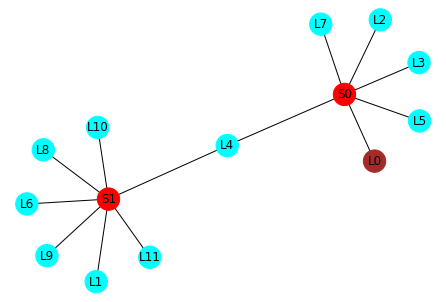

In [43]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [44]:
neuron_obj.same_soma_multi_touching_limbs

array([0])

In [45]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([0, 4])

# Getting the Split Suggestions

In [11]:
neuron = reload(neuron)

In [13]:
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [ ]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)

In [ ]:
nviz.visualize_neuron_path(neuron_obj,
    limb_idx=0,
    path=[32, 29, 30, 31, 34, 35, 27, 23])

In [ ]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                 node_colors=ret_col)

multi_soma_limbs = [4]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [(148, 168)]


---- working on disconnecting 148 and 168
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Shortest path = [148, 142, 139, 131, 130, 145, 161, 156, 162, 167, 173, 168]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
Short segments to combine = []
Found 4 high degree coordinates to cut
Picking [724510. 583785. 823303.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [106, 130, 132, 145]
106 = red
130 = aqua
132 = purple
145 = green


Angle between 106 and 130 = 74.37 
Angle between 106 and 132 = 89.0 
Angle between 106 and 145 = 51.87 
Angle between 130 and 132 = 19.05 
Angle between 130 and 145 = 103.52 
Angle between 132 and 145 = 94.0 
Final Matches = [[130, 132]]
matched_branches_revised = [[130, 132]]
Aligned Skeleton Parts


Original graph


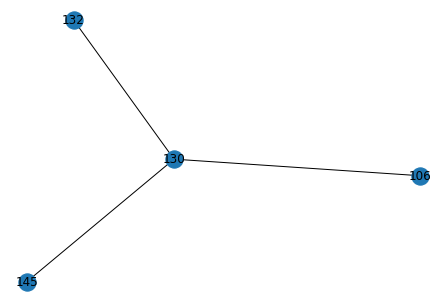

edges_to_delete (resolve crossover) = [array([130, 145]), array([106, 130])]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [array([130, 145]), array([106, 130])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {129, 130, 131, 132, 104, 73, 139, 141, 142, 143, 112, 109, 114, 115, 148, 113, 118, 119, 89, 90}
Comp 1 = {106, 107, 84, 86, 88}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 108, 110, 111, 116, 117, 120, 121, 122, 123, 124, 125, 126, 127, 128, 133, 134, 135, 136, 137, 138, 140, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156,

  Edge: [6 3]: curr_angle = 57.57
  Edge: [3 2]: curr_angle = 13.84
  Edge: [2 0]: curr_angle = 25.17

Total time for doubling_back = 0.4724152088165283

Attempting the width jump check (attempting from both sides)
  Edge: [6 3]: jump = -270.06
  Edge: [3 2]: jump = 67.07
  Edge: [2 0]: jump = 95.59
Total time for width = 0.44541358947753906
Path starting at 6 had err_edges: []
  Edge: [0 2]: jump = -95.59
  Edge: [2 3]: jump = -67.07
  Edge: [3 6]: jump = 270.06
Adding error edge [3 6] because width jump was 270.06495128126267
Total time for width = 0.4488637447357178
Path starting at 0 had err_edges: [[3, 6]]
first_error_sizes = [-inf, 270.06495128126267], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [3, 5, 6]
3 = red
5 = aqua
6 = purple
Angle between 3 and 5 = 115.24 
Angle between 3 and 6 = 46.05 
Angle between 5 and 6 = 23.68 
Final Matches = [[5, 6]]
matched_branches_revised = [[5, 6]]
Original graph


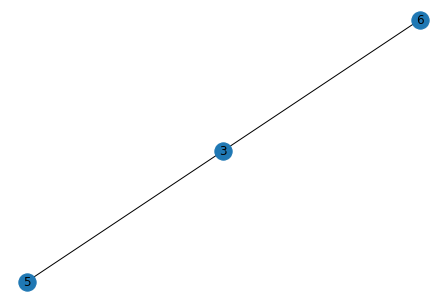

edges_to_delete (resolve crossover) = [array([3, 5]), array([3, 6])]
edges_to_create (resolve crossover) = [array([5, 6])]
edges_to_delete (cut_limb_network) = [array([3, 5]), array([3, 6])]
edges_to_create = [array([5, 6])]
Accepted edge ((5, 6))
Number of connected components = 2
Comp 0 = {5, 6}
Comp 1 = {0, 1, 2, 3, 4, 7, 8}
After get best cut: cut_edges = [array([3, 5]), array([3, 6])], added_edges = [[5, 6]]
-----------counter = 0------------
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3


In [46]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                verbose=True,
                                plot_intermediates=True,
                                )

# Plotting the Results

In [47]:
pru = reload(pru)
nviz = reload(nviz)
nviz.plot_split_suggestions_per_limb(neuron_obj,limb_results)



-------- Suggestions for Limb 0------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 4------

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [48]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L4="all"))


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Getting the Neuroglancer link

In [52]:
split_coordinates = pru.get_all_coordinate_suggestions(limb_results)

pru.neuroglancer_split_link(split_coordinates,
                      neuron_obj.segment_id)